In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### 和鲸

![avatar](figure/heywhale1.png)

![avatar](figure/heywhale2.png)

![avatar](figure/heywhale3.png)

![avatar](figure/heywhale4.png)

![avatar](figure/heywhale5.png)

![avatar](figure/heywhale6.png)

![avatar](figure/heywhale7.png)

![avatar](figure/heywhale8.png)

### Bayes Rule

### 假定你有一个地球仪代表我们的星球。你很好奇有多少表面被水覆盖，可以采取以下策略：将地球抛到空中，当你抓住它时记录下右手食指下的表面是水还是陆地。然后将地球仪再次抛向空中，重复上述步骤。

### 这9次的结果如下(W代表水，L代表陆地)：W L W W W L W L W

### 我们规定

### (1) 覆盖地球的水的真实比例是*p*

### (2) 每次抛掷，有*p*的概率观测到水，有1-*p*的概率观测到陆地

### (3) 每次观测都是相互独立的

### 我们可以用二项分布来对这个事件进行描述：

### ![avatar](figure/rule1.png)

### 假定我们每次观测到水的概率为*p*，观测到 W L W W W L W L W 这一事件的概率为多少？

In [6]:
p = stats.binom.pmf(6,9, 0.5) #二项分布，在9次事件中观测到6次目标，p=0.5
print(f"我们观察到这一事件的概率为{p}")

我们观察到这一事件的概率为0.16406250000000003


### 在没有进行任何观测时，事件发生的概率假定为均匀分布

### $$ p \sim Uniform(0,1) $$

### 当观测发生时，事件发生的概率服从二项分布

### $$ W \sim Binomial(N,p) $$

### 每一次事件发生，我们都对概率进行一次迭代

### ![avatar](figure/bayes2.png)

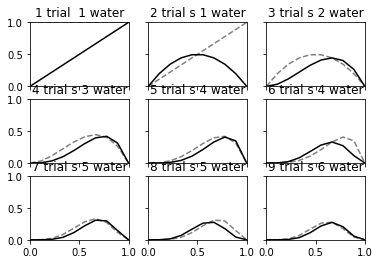

In [30]:
from turtle import color


_, axes = plt.subplots(3,3, sharey=True, sharex=True)
axes = np.ravel(axes)

n_trials = [1, 2, 3, 4, 5, 6, 7, 8, 9] #每一轮累计试次数
success = [1, 1, 2, 3, 4, 4, 5, 5, 6] #每一轮累计成功数
data = zip(n_trials, success) #两个数组合并为二维形式


x = np.linspace(0,1,10) #将0-1均匀分为9段

for idx,(n,w) in enumerate(data):
    s_n = ("s" if (n > 1) else "")

    if idx == 0:
        y = stats.uniform.pdf(x,0,1) #均匀分布
        axes[idx].plot(x, y, color='grey', ls = '--')
        axes[idx].set_ylim(0, 1)
        axes[idx].set_xlim(0, 1)
    else:
        axes[idx].plot(x, y_last, color='grey', ls = '--')
        axes[idx].set_ylim(0, 1)
        axes[idx].set_xlim(0, 1)

    y = stats.binom.pmf(w,n,x) #二项分布

    y_last  = y

    axes[idx].plot(x, y ,color = 'black')
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xlim(0, 1)
    axes[idx].set_title(f"{n} trial {s_n} {w} water")


### ![avatar](figure/b1.png)
### ![avatar](figure/b2.png)
### ![avatar](figure/b3.png)
### ![avatar](figure/b4.png)

### ![avatar](figure/b5.png)
### ![avatar](figure/b6.png)

### ![avatar](figure/bayes.png)

### 不同的先验和似然会产生不同的后验分布

### ![avatar](figure/p_l_p.png)

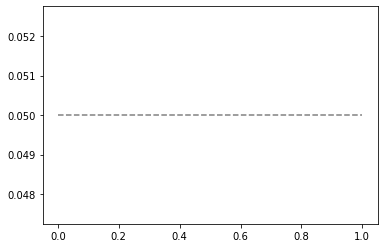

In [50]:
x = np.linspace(0,1,20)

prior = stats.uniform.pdf(x,0,1)/np.sum(stats.uniform.pdf(x,0,1))

plt.plot(x, prior , color = 'grey',ls = '--')

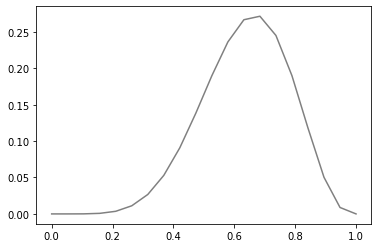

In [59]:
likelihood = stats.binom.pmf(6,9, x)

plt.plot(x, likelihood , color = 'grey')

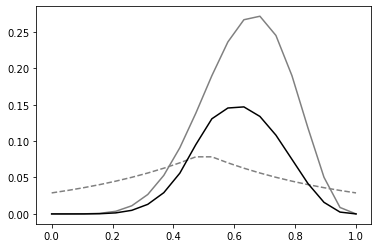

In [62]:
unstd_posterior = prior*likelihood
posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, prior , color = 'grey',ls = '--')
plt.plot(x, likelihood , color = 'grey')
plt.plot(x, posterior , color = 'black')

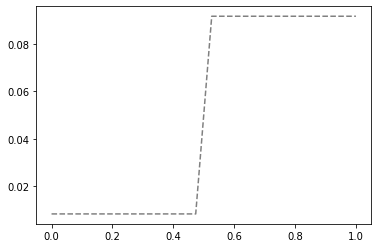

In [64]:
x = np.linspace(0,1,20)

prior = np.concatenate([np.repeat(0.1,10),np.repeat(1.1,10)])/np.sum(np.concatenate([np.repeat(0.1,10),np.repeat(1.1,10)]))

plt.plot(x, prior , color = 'grey',ls = '--')

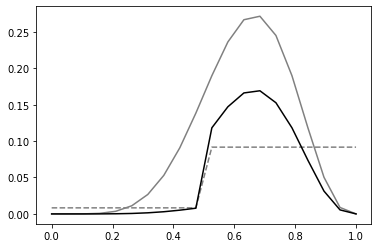

In [65]:
unstd_posterior = prior*likelihood
posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, prior , color = 'grey',ls = '--')
plt.plot(x, likelihood , color = 'grey')
plt.plot(x, posterior , color = 'black')

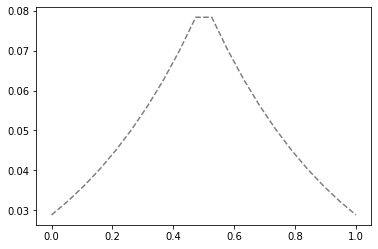

In [66]:
x = np.linspace(0,1,20)

prior = np.concatenate([np.exp(np.linspace(0,1,10)),np.exp(np.linspace(1,0,10))])/np.sum(np.concatenate([np.exp(np.linspace(0,1,10)),np.exp(np.linspace(1,0,10))]))

plt.plot(x, prior , color = 'grey',ls = '--')

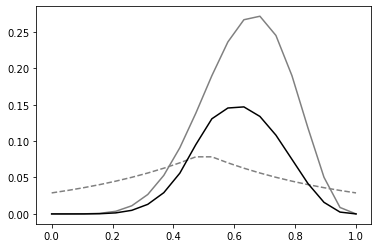

In [67]:
unstd_posterior = prior*likelihood
posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, prior , color = 'grey',ls = '--')
plt.plot(x, likelihood , color = 'grey')
plt.plot(x, posterior , color = 'black')